In [299]:
#!pip install plotly
#import plotly
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

In [300]:
#!pip install pydot
#!pip install graphviz
#!pip install pydot-ng

In [1337]:
class Node:
    def __init__(self,key='',item='',color='R',left=None,right=None,parent=None):
        self.left = left
        self.right = right
        self.parent = parent 
        self.key = key
        self.item = item
        self.color = color
        
    def updateParent(self):
        if self.left is not None:
            self.left.parent = self
        if self.right is not None:
            self.right.parent = self
            
    def copy(self):
        return Node(self.key,self.item,self.color,self.left,self.right,self.parent)
        
class entry:
    def __init__(self,key='',item='',color='R'):
        self.key = key
        self.item = item
        self.color = color
        
class RBT:
    def __init__(self):
        self.entries = []
        self.nil = Node(-np.inf)
        self.nil.color = 'B'
        self.nil.left = None
        self.nil.right = None
        self.root = self.nil
    
    def getentries(self,root):
        if root:
            self.getentries(root.left)
            self.entries.append(entry(key=root.key,item=root.item))
            self.getentries(root.right)
    
    def balance(self):
        self.entries = []
        self.getentries(self.root)
        self.root = None
        self.construct(self.entries)
    
    def insert(self,entry):
        # Ordinary Binary Search Insertion
        node = Node(key=entry.key,item=entry.item)
        node.parent = None
        node.key = entry.key
        node.item = entry.item
        node.left = self.nil
        node.right = self.nil
        node.color = 'R' # new node must be red

        y = None
        x = self.root

        while x != self.nil:
            y = x
            if node.key < x.key:
                x = x.left
            else:
                x = x.right

        # y is parent of x
        node.parent = y
        if y == None:
            self.root = node
        elif node.key < y.key:
            y.left = node
        else:
            y.right = node

        # if new node is a root node, simply return
        if node.parent == None:
            node.color = 'B'
            return

        # if the grandparent is None, simply return
        if node.parent.parent == None:
            return

        # Fix the tree
        self.__fix_insert(node)
        
    def getRoot(self):
        return self.root
    
    def __fix_insert(self, k):
        while k.parent.color == 'R':
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left 
                if u.color == 'R':
                    # if U = red, P = red, both -> black, G -> red
                    u.color = 'B'
                    k.parent.color = 'B'
                    k.parent.parent.color = 'R'
                    # check same for G
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        # if U = black, N = P.left, rotateRight around P
                        k = k.parent
                        self.rotateRight(k)
                    # G -> black, G.parent -> red, rotateLeft around G.parent
                    k.parent.color = 'B'
                    k.parent.parent.color = 'R'
                    self.rotateLeft(k.parent.parent)
            else:
                u = k.parent.parent.right # uncle

                if u.color == 'R':
                    u.color = 'B'
                    k.parent.color = 'B'
                    k.parent.parent.color = 'R'
                    k = k.parent.parent 
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.rotateLeft(k)
                    k.parent.color = 'B'
                    k.parent.parent.color = 'R'
                    self.rotateRight(k.parent.parent)
            if k == self.root:
                break
        self.root.color = 'B'   
        
    def min(self,root):
        node = root
        while node.left != self.nil:
            node = node.left
        return node
    
    def max(self,root):
        node = root
        while node.right != self.nil:
            node = node.right
        return node
    
    def inorder(self,root):
        if root:
            self.inorder(root.left)
            print(root.key)
            self.inorder(root.right)
    
    def height(self,node):
        if node is None:
            return 0
        else:
            lheight = self.height(node.left)
            rheight = self.height(node.right)
 
            if lheight > rheight:
                return lheight+1
            else:
                return rheight+1
    
    def printLevelOrder(self):
        h = self.height(self.root)
        for i in range(1, h+1):
            self.printCurrentLevel(self.root, i)
 
 
    def printCurrentLevel(self,root,level):
        if root is None:
            return
        if level == 1:
            print(root.key,end=" ")
        elif level > 1:
            self.printCurrentLevel(root.left,level-1)
            self.printCurrentLevel(root.right,level-1)
    
    def predecessor(self,root=None,prec=None,key=None):

        if root is None:
            return None

        if root.key == key:
            if root.left:
                return self.max(root.left)

        elif key < root.key:
            return self.predecessor(root.left, prec, key)

        else:
            prec = root
            return self.predecessor(root.right, prec, key)
 
        return prec

    def successor(self,root=None,suc=None,key=None):

        if root is None:
            return None

        if root.key == key:
            if root.right:
                return self.min(root.right)

        elif key > root.key:
            return self.successor(root.right, suc, key)

        else:
            suc = root
            return self.successor(root.left, suc, key)
 
        return suc
    
    def rotateLeft(self,node):
        y = node.right
        node.right = y.left
        if y.left != self.nil:
            y.left.parent = node
        
        y.parent = node.parent
        if node.parent is None:
            self.root = y
        elif node == node.parent.left:
            node.parent.left = y
        else:
            node.parent.right = y
        y.left = node
        node.parent = y
    
    def rotateRight(self,node):
        y = node.left
        node.left = y.right
        if y.right != self.nil:
            y.right.parent = node
        
        y.parent = node.parent
        if node.parent is None:
            self.root = y
        elif node == node.parent.right:
            node.parent.right = y
        else:
            node.parent.left = y
        y.right = node
        node.parent = y
    
    def __rb_transplant(self, u, v):
        if u.parent == None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent
        
    def __delete_node_helper(self, node, entry):
        # find the node containing key
        z = self.nil
        while node != self.nil:
            if node.key == entry.key:
                z = node

            if node.key <= entry.key:
                node = node.right
            else:
                node = node.left

        if z == self.nil:
            print("Couldn't find key in the tree")
            return

        y = z
        y_original_color = y.color
        if z.left == self.nil:
            x = z.right
            self.__rb_transplant(z, z.right)
        elif (z.right == self.nil):
            x = z.left
            self.__rb_transplant(z, z.left)
        else:
            y = self.min(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.__rb_transplant(y, y.right)
                y.right = z.right
                y.right.parent = y

            self.__rb_transplant(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color
        if y_original_color == 'B':
            self.__fix_delete(x)    
        
    def delete(self, entry):
        self.__delete_node_helper(self.root, entry)
        
    def __fix_delete(self, x):
        while x != self.root and x.color == 'B':
            if x == x.parent.left:
                s = x.parent.right
                if s.color == 'R':
                    # case 3.1
                    s.color = 'B'
                    x.parent.color = 'R'
                    self.rotateLeft(x.parent)
                    s = x.parent.right

                if s.left.color == 'B' and s.right.color == 'B':
                    # case 3.2
                    s.color = 'R'
                    x = x.parent
                else:
                    if s.right.color == 'B':
                        # case 3.3
                        s.left.color = 'B'
                        s.color = 'R'
                        self.rotateRight(s)
                        s = x.parent.right

                    # case 3.4
                    s.color = x.parent.color
                    x.parent.color = 'B'
                    s.right.color = 'B'
                    self.rotateLeft(x.parent)
                    x = self.root
            else:
                s = x.parent.left
                if s.color == 'R':
                    # case 3.1
                    s.color = 'B'
                    x.parent.color = 'R'
                    self.rotateRight(x.parent)
                    s = x.parent.left

                if s.left.color == 'B' and s.right.color == 'B':
                    # case 3.2
                    s.color = 'R'
                    x = x.parent
                else:
                    if s.left.color == 'B':
                        # case 3.3
                        s.right.color = 'B'
                        s.color = 'R'
                        self.rotateLeft(s)
                        s = x.parent.left 

                    # case 3.4
                    s.color = x.parent.color
                    x.parent.color = 'B'
                    s.left.color = 'B'
                    self.rotateRight(x.parent)
                    x = self.root
        x.color = 'B'    

In [1360]:
def traverse(node,g):
    global colors
    
    if node and node.key != -np.inf:
        colors[node.key] = node.color
        traverse(node.left,g)
        if node.parent:
            g.add_edge(node.parent.key,node.key)
        traverse(node.right,g) 

def draw_tree():
    global colors
    colors = {}

    g = nx.DiGraph()
    traverse(tree.root,g)
    
    color_map = []
    
    for n in g.nodes():
        if colors[n] == 'R':
            color_map.append("red")
        else:
            color_map.append("black")
    
    pos = graphviz_layout(g, prog="dot")
    nx.draw(g, pos, node_color=color_map, with_labels=True, font_color="whitesmoke")
    plt.show()  

In [1355]:
arr = [8,12,5,3,2,4,7,0,6,10,9,11,17,13]
#arr = [entry(key=a) for a in arr]

In [1356]:
tree = RBT()

In [1357]:
#tree.construct(arr)
for a in arr:
    tree.insert(entry(key=a))

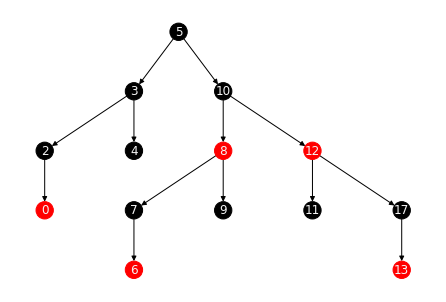

In [1358]:
draw_tree()

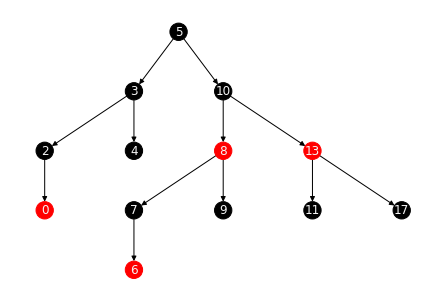

In [1359]:
tree.delete(entry(key=12))
draw_tree()

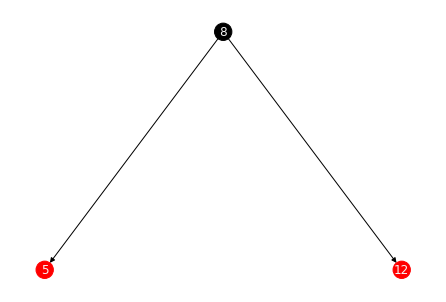

In [1305]:
tree.insert(entry(key=arr[2]))
draw_tree()

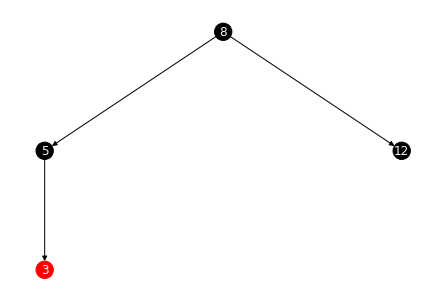

In [1306]:
tree.insert(entry(key=arr[3]))
draw_tree()

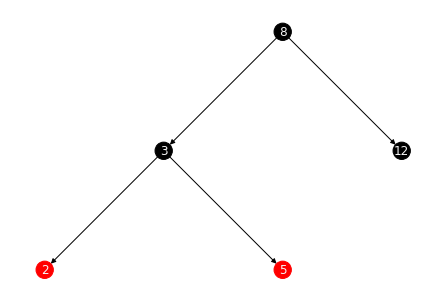

In [1307]:
tree.insert(entry(key=arr[4]))
draw_tree()

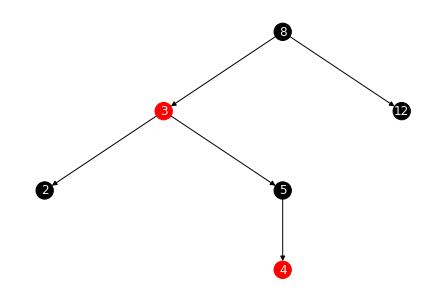

In [1308]:
tree.insert(entry(key=arr[5]))
draw_tree()

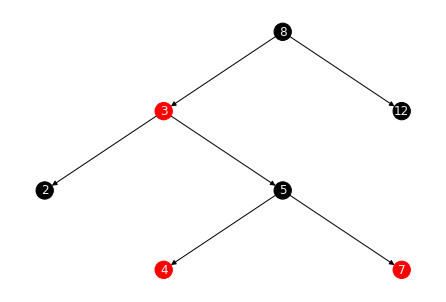

In [1309]:
tree.insert(entry(key=arr[6]))
draw_tree()

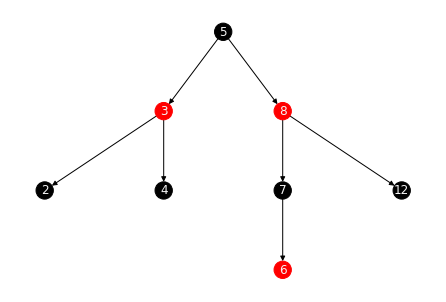

In [1310]:
tree.insert(entry(key=arr[7]))
draw_tree()

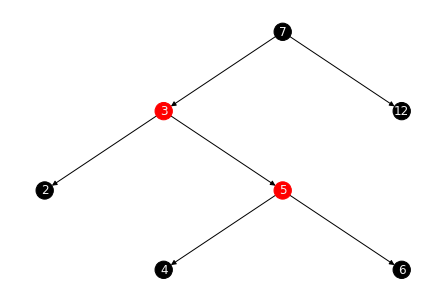

In [1284]:
tree.delete(8)

draw_tree()

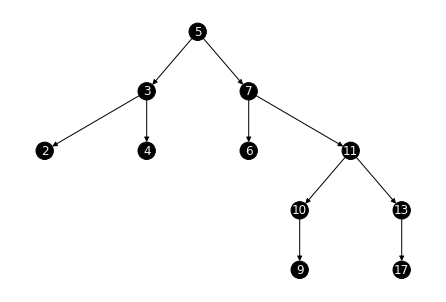

In [696]:
tree.delete(12)

draw_tree()

True


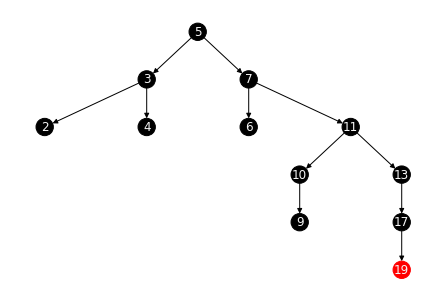

In [697]:
tree.push(entry(key=19))

draw_tree()

True


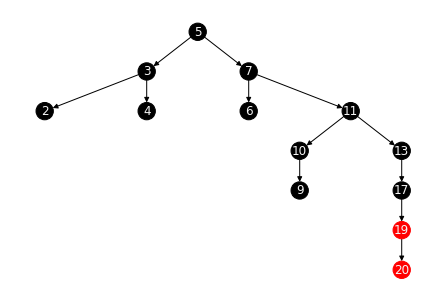

In [698]:
tree.push(entry(key=20))

draw_tree()

In [682]:
tree.colorParent(tree.root.right.right.right.right.right.right,red=False)

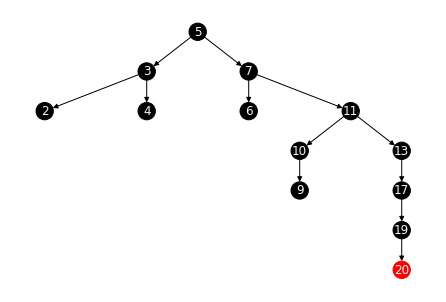

In [683]:
draw_tree()